# Boolean Indexing

In [3]:
import numpy as np
import pandas as pd

def print_ops(string):
    '''Splits the string on spaces to get operations
       Tries to run each operation and print the operation and its result
       If error: print operation and the type of error encoutered
       String example: 's s[1::3] s[10] s[-1]' '''
    for op in string.split():
        try:
            print(op + ':', eval(op), sep='\n', end='\n\n')
        except Exception as e:
            print(op + ': ' + str(type(e)), end='\n\n')

It is recommended to use .loc or .iloc to access elements of a series but boolean indexing is an exception and True/False can be placed directly inside []

In [4]:
s = pd.Series(np.random.randn(7), index=list('abcdefg'))
keep = [True, False, True, False, False, True, False]
criteria_1 = s > 0
criteria_2 = s.index > 'c'

ops = 's keep s[keep] s>0 s[s>0] s[criteria_1] s[s.index>"c"] s[criteria_2]'
print_ops(ops)

s:
a    0.796663
b    0.858258
c    0.387284
d    0.595878
e    0.143111
f    0.228314
g   -1.120881
dtype: float64

keep:
[True, False, True, False, False, True, False]

s[keep]:
a    0.796663
c    0.387284
f    0.228314
dtype: float64

s>0:
a     True
b     True
c     True
d     True
e     True
f     True
g    False
dtype: bool

s[s>0]:
a    0.796663
b    0.858258
c    0.387284
d    0.595878
e    0.143111
f    0.228314
dtype: float64

s[criteria_1]:
a    0.796663
b    0.858258
c    0.387284
d    0.595878
e    0.143111
f    0.228314
dtype: float64

s[s.index>"c"]:
d    0.595878
e    0.143111
f    0.228314
g   -1.120881
dtype: float64

s[criteria_2]:
d    0.595878
e    0.143111
f    0.228314
g   -1.120881
dtype: float64



In [5]:
ops = '''s[s.index.isin(['a','c'])] s.loc[['a','c']]'''
print_ops(ops)

s[s.index.isin(['a','c'])]:
a    0.796663
c    0.387284
dtype: float64

s.loc[['a','c']]:
a    0.796663
c    0.387284
dtype: float64



### More complex boolean indexing and reverse criteria

In [6]:
s = pd.Series(np.arange(500))
criteria = (s % 2 == 0) & (s % 13 == 0) | (s % 100 == 0)
print_ops('criteria.head(5) s[criteria].head(7) s[~criteria].head(7)')

criteria.head(5):
0     True
1    False
2    False
3    False
4    False
dtype: bool

s[criteria].head(7):
0        0
26      26
52      52
78      78
100    100
104    104
130    130
dtype: int32

s[~criteria].head(7):
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int32



# Case Study: Calculating Normality of Stock Market Returns
We will examine the returns of different stocks to determine if their daily returns follow a normal distribution. Before we begin you will have to install the third-party library **`pandas-datareader`**. This library does not come pre-packaged with Anaconda so you will have to install it by opening up a terminal and running the following command:

### Pandas Datareader
[Pandas Datareader](http://pandas-datareader.readthedocs.io/en/latest/) is a nice package that retrieves financial data from different online data sources. In this example we will import the **`data`** module and use the **`DataReader`** function to retrieve Amazon stock price data from google finance from 2010 to present.

In [7]:
from pandas_datareader import data
amzn = data.DataReader('amzn', 'google')
close = amzn['Close']

ops = 'amzn.info() amzn.head(10) close.head(10) type(close)'
print_ops(ops)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1748 entries, 2010-01-04 to 2016-12-12
Data columns (total 5 columns):
Open      1748 non-null float64
High      1748 non-null float64
Low       1748 non-null float64
Close     1748 non-null float64
Volume    1748 non-null int64
dtypes: float64(4), int64(1)
memory usage: 81.9 KB
amzn.info():
None

amzn.head(10):
              Open    High     Low   Close    Volume
Date                                                
2010-01-04  136.25  136.61  133.14  133.90   7600543
2010-01-05  133.43  135.48  131.81  134.69   8856456
2010-01-06  134.60  134.73  131.65  132.25   7180977
2010-01-07  132.01  132.32  128.80  130.00  11030124
2010-01-08  130.56  133.68  129.03  133.52   9833829
2010-01-11  132.62  132.80  129.21  130.31   8786668
2010-01-12  128.99  129.82  126.55  127.35   9098190
2010-01-13  127.90  129.71  125.75  129.11  10727856
2010-01-14  129.14  130.38  126.40  127.35   9788435
2010-01-15  129.18  129.65  127.06  127.14  153827

### % difference (actually fraction, not a %...) between current and previous element and handling missing value

In [8]:
close_change = close.pct_change()
close_change_dropna = close_change.dropna()
print_ops('close_change.head() close_change_dropna.head()')

close_change.head():
Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

close_change_dropna.head():
Date
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
2010-01-11   -0.024041
Name: Close, dtype: float64



In [9]:
s = pd.Series(range(10), index=range(10))
s_pct_change = s.pct_change()
s_pct_change_drop = s_pct_change.dropna()
print(s, s_pct_change, s_pct_change_drop, sep='\n\n')

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

0         NaN
1         inf
2    1.000000
3    0.500000
4    0.333333
5    0.250000
6    0.200000
7    0.166667
8    0.142857
9    0.125000
dtype: float64

1         inf
2    1.000000
3    0.500000
4    0.333333
5    0.250000
6    0.200000
7    0.166667
8    0.142857
9    0.125000
dtype: float64


### Checking for Normality
There are formal statistical tests for normality that can be used. Instead we will focus on simple data exploration to give us insight.

### Histogram (and inline plot)

In [10]:
# magic command on order to have plots embedded into the notebook
%matplotlib inline

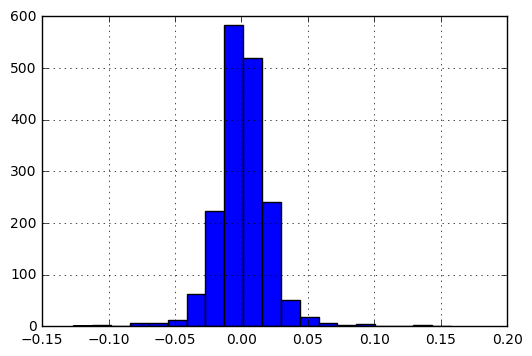

In [11]:
close_change_dropna.hist(bins=20)

The plot above is bell-shaped and could possibly represent a normal distribution. To more formally check for normality we can count the number of observations that are within 1, 2, and 3 standard deviations. The [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) can be used to know if the data is approximately normal.

We first need to calculate the mean, standard deviation and get the number of observations.

In [12]:
n_obs = close_change_dropna.size
mean = close_change_dropna.mean()
std = close_change_dropna.std()

### % of observations within 1, 2, and 3 standard deviation
Expectation for a normal distribution: 68%, 95%, and 99.7%

In [13]:
pct_obs_in_std = {}
for n_std in range(1, 4):
    criteria = abs(close_change_dropna - mean) < n_std*std
    pct_obs_in_std['{}_std'.format(n_std)] = close_change_dropna[criteria].size / close_change_dropna.size *100
    
    print('% of observations within {} standard deviation from the mean:\n\t{}%'.format(
           n_std, round(pct_obs_in_std['{}_std'.format(n_std)], 1)))

% of observations within 1 standard deviation from the mean:
	78.8%
% of observations within 2 standard deviation from the mean:
	95.6%
% of observations within 3 standard deviation from the mean:
	98.5%


##### Same as above but faster

In [14]:
for n_std in range(1, 4):
    criteria = abs(close_change_dropna - mean) < n_std*std
    pct_obs_in_std['{}_std'.format(n_std)] = criteria.sum() / close_change_dropna.size * 100
    
    print('% of observations within {} standard deviation from the mean:\n\t{}%'.format(
           n_std, round(pct_obs_in_std['{}_std'.format(n_std)], 1)))

% of observations within 1 standard deviation from the mean:
	78.8%
% of observations within 2 standard deviation from the mean:
	95.6%
% of observations within 3 standard deviation from the mean:
	98.5%


### What you should know
* Use .iloc and .loc to access elements in a Series
* Use [ ] when using boolean indexing
* Can create a 'criteria' variable or just pass the boolean expression into the [ ]
* Use &, |, ~ instead of and, or, not in pandas for boolean operations
* Wrap each boolean expression in parentheses
* Use .head to shorten Series output
* Know how to use Series methods 
* Assignment of one series to another (**`s = s1`**) does not create a new object.

### Problem 1
<span  style="color:green; font-size:16px">Create a function that accepts a stock ticket symbol (amzn for example) and returns the percentage of prices within 1, 2, and 3 standard deviations from the mean. Use your function to return results for different stocks (tsla, fb, slb, gm, etc...)</span>

In [15]:
print(data.DataReader('amzn', 'google').info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1748 entries, 2010-01-04 to 2016-12-12
Data columns (total 5 columns):
Open      1748 non-null float64
High      1748 non-null float64
Low       1748 non-null float64
Close     1748 non-null float64
Volume    1748 non-null int64
dtypes: float64(4), int64(1)
memory usage: 81.9 KB
None


In [40]:
def pct_within_std(stock_ticket, close=True):
    '''uses stock ticket symbol (amzn for example) to return the percentage 
    of prices within 1, 2, and 3 standard deviations from the mean in a list, 
    in this respective order
    stock_ticket: stock ticket, ex:'''
    
    stock = data.DataReader(stock_ticket, 'google')
    when = 'Close' if close else 'Open'
    price_change = stock[when].pct_change().dropna()
    pct_in_n_std = []
    for n_std in range(1, 4):
        criteria = abs(price_change - price_change.mean()) < n_std*price_change.std()
        pct_in_n_std.append(criteria.mean())
    return pct_in_n_std

tickets = ['amzn', 'tsla', 'fb', 'slb', 'gm']
df = pd.DataFrame(columns=['1std', '2std', '3std'], index=tickets)

for ticket in df.index:
    df.loc[ticket] = pct_within_std(ticket)
df = df.applymap(lambda x: round(x, 3)) 

print(df)

       1std   2std   3std
amzn  0.788  0.956  0.985
tsla  0.787  0.951  0.984
fb    0.794  0.958  0.989
slb   0.742  0.945  0.987
gm    0.763  0.947  0.988


### Problem 2
<span  style="color:green; font-size:16px">Write a one line expression that returns the maximum number of standard deviations from the mean for any one day return.</span>

In [17]:
print(pd.Series(abs(close_change_dropna - mean) / std).max())

7.63400366509


### Problem 3
<span  style="color:green; font-size:16px">Create a Series, **`tsla`**, by getting the closing price of Tesla motors (symbol TSLA) using the pandas_datareader library. Series  **`tsla`** will be continually referred to for the rest of the problems. Output the first 10 values.</span>

In [46]:
tsla = data.DataReader('tsla', 'google')['Close']
print(tsla.head(10))

Date
2010-06-29    23.89
2010-06-30    23.83
2010-07-01    21.96
2010-07-02    19.20
2010-07-06    16.11
2010-07-07    15.80
2010-07-08    17.46
2010-07-09    17.40
2010-07-12    17.05
2010-07-13    18.14
Name: Close, dtype: float64


### Problem 4
<span  style="color:green; font-size:16px">There are many dozens of Series methods and attributes. Use the following methods correctly with variable **tsla** : **`rank, cummax, sample, describe, quantile, idxmax, empty`**. Make sure to read the documentation for correct usage. Use a new code cell for each command and remember to use the **`head`** method to restrict long output.</span>

In [19]:
tsla_rank = tsla.rank()
# print(tsla_rank.head())
# print(tsla[tsla == tsla.min()])
# print(tsla_rank[tsla_rank == tsla_rank.min()], end='\n\n')
# # print(tsla_rank['2010-07-06':'2010-07-08'], end='\n\n')
# # print(tsla.rank()['2010-07-06':'2010-07-08'])
# print(tsla[tsla == tsla.max()])
# print(tsla_rank[tsla_rank == tsla_rank.max()])
ops = 'tsla[tsla==tsla.min()] tsla_rank[tsla_rank==tsla_rank.min()] \
       tsla[tsla==tsla.max()] tsla_rank[tsla_rank==tsla_rank.max()]'
print_ops(ops)

tsla[tsla==tsla.min()]:
Date
2010-07-07    15.8
Name: Close, dtype: float64

tsla_rank[tsla_rank==tsla_rank.min()]:
Date
2010-07-07    1.0
Name: Close, dtype: float64

tsla[tsla==tsla.max()]:
Date
2014-09-04    286.04
Name: Close, dtype: float64

tsla_rank[tsla_rank==tsla_rank.max()]:
Date
2014-09-04    1627.0
Name: Close, dtype: float64



In [20]:
# print(tsla.cummax().head())
# print(tsla.cummax().tail())
# print(tsla.cummax().loc['2010-11-01':'2010-11-05'])
# print(tsla.head())
# print(tsla.loc['2010-11-01':'2010-11-05'])
ops = "tsla.cummax().head() tsla.cummax().tail() tsla.cummax().loc['2010-11-01':'2010-11-05']\
       tsla.head() tsla.loc['2010-11-01':'2010-11-05']"
print_ops(ops)

tsla.cummax().head():
Date
2010-06-29    23.89
2010-06-30    23.89
2010-07-01    23.89
2010-07-02    23.89
2010-07-06    23.89
Name: Close, dtype: float64

tsla.cummax().tail():
Date
2016-12-06    286.04
2016-12-07    286.04
2016-12-08    286.04
2016-12-09    286.04
2016-12-12    286.04
Name: Close, dtype: float64

tsla.cummax().loc['2010-11-01':'2010-11-05']:
Date
2010-11-01    23.89
2010-11-02    23.89
2010-11-03    23.89
2010-11-04    24.90
2010-11-05    24.90
Name: Close, dtype: float64

tsla.head():
Date
2010-06-29    23.89
2010-06-30    23.83
2010-07-01    21.96
2010-07-02    19.20
2010-07-06    16.11
Name: Close, dtype: float64

tsla.loc['2010-11-01':'2010-11-05']:
Date
2010-11-01    21.41
2010-11-02    21.25
2010-11-03    21.77
2010-11-04    24.90
2010-11-05    24.44
Name: Close, dtype: float64



In [21]:
print(tsla.sample(10))

Date
2015-04-10    210.90
2016-01-27    188.07
2015-05-21    245.62
2016-06-07    232.34
2011-05-04     26.69
2013-12-11    139.65
2016-09-09    194.47
2014-01-22    178.56
2012-09-14     30.39
2011-11-08     31.84
Name: Close, dtype: float64


In [22]:
print(tsla.describe())

count    1627.000000
mean      128.024425
std        93.413620
min        15.800000
25%        29.500000
50%       144.700000
75%       217.725000
max       286.040000
Name: Close, dtype: float64


In [23]:
ops = "tsla.quantile(.33) tsla.quantile(.5) tsla.quantile(.75)"
print_ops(ops)

tsla.quantile(.33):
32.915800000000004

tsla.quantile(.5):
144.7

tsla.quantile(.75):
217.725



In [24]:
#returns index of first occurence of max value
print(tsla.idxmax(), '\n')
print(tsla[tsla == tsla.max()])

2014-09-04 00:00:00 

Date
2014-09-04    286.04
Name: Close, dtype: float64


In [25]:
print(tsla.empty)

False


In [56]:
s1 = pd.Series()
print(s1.empty)
s2 = pd.Series(index=[1, 2, 3])
print(s2)
print(s2.empty)
print(s2.isnull().all())
print(s2.isnull().sum())

True
1   NaN
2   NaN
3   NaN
dtype: float64
False
True
3


### Problem 5
<span  style="color:green; font-size:16px"> Sort **`tsla`** by descending values and save it to variable **`tsla1`**. Output the first 10 values to check that the sort happened correctly.</span>

In [26]:
tsla1 = tsla.sort_values()
print(tsla1.head(10))

Date
2010-07-07    15.80
2010-07-06    16.11
2010-07-12    17.05
2010-07-09    17.40
2010-07-08    17.46
2010-08-12    17.60
2010-08-11    17.90
2010-07-13    18.14
2010-08-13    18.32
2010-08-18    18.77
Name: Close, dtype: float64


### Problem 6
<span  style="color:green; font-size:16px">Use the **`sort_index`** method to re-sort **`tsla1`** back to its original ordering. Store this Series to **`tsla2`**. Use the **`equals`** method to check that **`tsla2`** does in fact equal **`tsla`**.</span>

In [27]:
tsla2 = tsla1.sort_index()
print(tsla2.equals(tsla))

True


### Problem 7
<span  style="color:green; font-size:16px">Instead of using the **`equals`** method, test equality between **`tsla`** and **`tsla2`** by using the comparison operator **`==`** and the **`all`** method.</span>

In [57]:
(tsla==tsla2).all()

True

In [28]:
equal = tsla == tsla2
print(equal.all())

True


### Problem 8
<span  style="color:green; font-size:16px">Slicing! Using iloc, slice series **`tsla`**:<ol><li>Retrieve the first 6 elements</li><li>Retrieve every 18th element</li><li>Reverse the series</li><li>Write two ways to get every 4th element starting from the 993rd element to the 593rd</li><li>Chain your slicing multiple times by getting every other element, then every third element, then every 4th element, then every 5th element</li></ol>
</span>

Use **`head`** method to shorten long output.

In [60]:
ops = '''tsla.iloc[:6]
         tsla.iloc[::18].head()
         tsla.iloc[::-1].head()
         tsla.iloc[993:592:-4].head()
         tsla.iloc[593:994:4].iloc[::-1].head()
         tsla.iloc[::2].iloc[::3].iloc[::4].iloc[::5].head()'''
print_ops(ops)

tsla.iloc[:6]:
Date
2010-06-29    23.89
2010-06-30    23.83
2010-07-01    21.96
2010-07-02    19.20
2010-07-06    16.11
2010-07-07    15.80
Name: Close, dtype: float64

tsla.iloc[::18].head():
Date
2010-06-29    23.89
2010-07-26    20.95
2010-08-19    18.79
2010-09-15    21.98
2010-10-11    20.24
Name: Close, dtype: float64

tsla.iloc[::-1].head():
Date
2016-12-12    192.43
2016-12-09    192.18
2016-12-08    192.29
2016-12-07    193.15
2016-12-06    185.85
Name: Close, dtype: float64

tsla.iloc[993:592:-4].head():
Date
2014-06-10    202.30
2014-06-04    203.99
2014-05-29    210.24
2014-05-22    204.88
2014-05-16    191.56
Name: Close, dtype: float64

tsla.iloc[593:994:4].iloc[::-1].head():
Date
2014-06-10    202.30
2014-06-04    203.99
2014-05-29    210.24
2014-05-22    204.88
2014-05-16    191.56
Name: Close, dtype: float64

tsla.iloc[::2].iloc[::3].iloc[::4].iloc[::5].head():
Date
2010-06-29    23.89
2010-12-17    31.36
2011-06-10    27.86
2011-11-30    32.74
2012-05-23    31.02
Name

### Problem 9
<span  style="color:green; font-size:16px"> How many days did Tesla close above 100 and below 150?</span>

In [61]:
print('Teslas closed above 100 and below 150 {} days'.format(((tsla > 100) & (tsla < 150)).sum()))

Teslas closed above 100 and below 150 90 days


### Problem 10
<span  style="color:green; font-size:16px"> How many days did Tesla close below 50 or above 200?</span>

In [63]:
print(((tsla < 50) | (tsla > 200)).sum())

1299


In [64]:
cat = data.DataReader('CAT', 'google')
print(cat.head())

             Open   High    Low  Close   Volume
Date                                           
2010-01-04  57.65  59.19  57.51  58.55  7326679
2010-01-05  58.55  59.44  58.23  59.25  5697197
2010-01-06  59.18  59.93  59.05  59.43  4718749
2010-01-07  59.30  59.90  58.65  59.67  5432913
2010-01-08  59.25  60.37  59.25  60.34  6651511


### Problem 11
<span  style="color:green; font-size:16px"> Lookup the definition for interquartile range and smartly slice your way from series s until you are left with the IQR </span>

In [32]:
IQR = tsla[(tsla > tsla.quantile(.25)) & (tsla < tsla.quantile(.75))]
print(tsla.describe())
print(IQR.describe())

count    1627.000000
mean      128.024425
std        93.413620
min        15.800000
25%        29.500000
50%       144.700000
75%       217.725000
max       286.040000
Name: Close, dtype: float64
count    812.000000
mean     123.285493
std       75.271739
min       29.510000
25%       34.495000
50%      144.700000
75%      198.082500
max      217.700000
Name: Close, dtype: float64


### Problem 12
<span  style="color:green; font-size:16px">Use the **`idxmax`** method to find the index labeled position of the highest closing price. Find out how many trading days it has been since tsla recorded it highest closing price.</span>

In [84]:
day_highest_closing = tsla.iloc[::-1].idxmax() # we reverse the series in order to get the most recent highest closing price
# print(type(day_highest_closing))
# number of days since highest closing:
days_since_highest = tsla.loc[day_highest_closing:].count()
print('Highest closing price was on {}, {} business days ago.'.format(
       day_highest_closing.strftime('%m-%d-%Y'), days_since_highest))

Highest closing price was on 09-04-2014, 574 business days ago.


### Problem 13
<span  style="color:green; font-size:16px">Assign Series tsla to tsla3 **`tsla3 = tsla`** and then change the value of the 0th element of tsla3 to 100. What has happened to tsla? We didn't talk about series assignment, but does it work as you would expect?</span>

In [85]:
tsla3 = tsla
tsla3.iloc[0] = 100
print(tsla.head())

Date
2010-06-29    100.00
2010-06-30     23.83
2010-07-01     21.96
2010-07-02     19.20
2010-07-06     16.11
Name: Close, dtype: float64


In [86]:
test = pd.Series(data=list('atcdxfghij'), index=range(10))
test = test.sort_values()
print(test)
test2 = test.iloc[::2]
print(test2)
print(test2.loc[1])
print(test2.iloc[1])

0    a
2    c
3    d
5    f
6    g
7    h
8    i
9    j
1    t
4    x
dtype: object
0    a
3    d
6    g
8    i
1    t
dtype: object
t
d


### Problem 14
<span  style="color:green; font-size:16px">Assign every 2nd element of **`tsla3`** the mean of **`tsla3`**. What happened to **`tsla`**? Is it the same size? Now assign elements 100 to 900 of **`tsla`** the variance of **`tsla`**. How much has each Series changed?</span>

In [87]:
tsla3.iloc[::2] = tsla.mean()
tsla.iloc[100:901] = tsla.var()
print(tsla.head())
print(tsla3.head())
print(tsla.equals(tsla3))

Date
2010-06-29    128.071205
2010-06-30     23.830000
2010-07-01    128.071205
2010-07-02     19.200000
2010-07-06    128.071205
Name: Close, dtype: float64
Date
2010-06-29    128.071205
2010-06-30     23.830000
2010-07-01    128.071205
2010-07-02     19.200000
2010-07-06    128.071205
Name: Close, dtype: float64
True


In [88]:
print(tsla[95:104])
print(tsla3[95:104])

Date
2010-11-11      28.040000
2010-11-12     128.071205
2010-11-15      30.800000
2010-11-16     128.071205
2010-11-17      29.490000
2010-11-18    4357.250561
2010-11-19    4357.250561
2010-11-22    4357.250561
2010-11-23    4357.250561
Name: Close, dtype: float64
Date
2010-11-11      28.040000
2010-11-12     128.071205
2010-11-15      30.800000
2010-11-16     128.071205
2010-11-17      29.490000
2010-11-18    4357.250561
2010-11-19    4357.250561
2010-11-22    4357.250561
2010-11-23    4357.250561
Name: Close, dtype: float64


### Problem 15
<span  style="color:green; font-size:16px">Get the original **`tsla`** dataset back by running code in Problem 3 again. Now redo problem 13 except assign **`tsla3`** a be copy of **`tsla`** using the **`copy`** Series method.</span>

In [115]:
tsla = data.DataReader('tsla', 'google')['Close']
tsla3 = tsla.copy()
tsla3.iloc[0] = 100
print(tsla.head())
print(tsla3.head())

Date
2010-06-29    23.89
2010-06-30    23.83
2010-07-01    21.96
2010-07-02    19.20
2010-07-06    16.11
Name: Close, dtype: float64
Date
2010-06-29    100.00
2010-06-30     23.83
2010-07-01     21.96
2010-07-02     19.20
2010-07-06     16.11
Name: Close, dtype: float64


### Problem 16
<span  style="color:green; font-size:16px">Using the inversion operator, the tilde (**`~`**) ouput a Series of all **`tsla`** values greater than 270.</span>

In [116]:
tsla[~(tsla <= 270)]

Date
2014-09-02    284.12
2014-09-03    281.19
2014-09-04    286.04
2014-09-05    277.39
2014-09-08    282.11
2014-09-09    278.48
2014-09-10    281.10
2014-09-11    280.31
2014-09-12    279.20
2015-07-02    280.02
2015-07-06    279.72
2015-07-17    274.66
2015-07-20    282.26
2015-08-05    270.13
Name: Close, dtype: float64

### Problem 17
<span  style="color:green; font-size:16px">Read the documentation on the **`where`** Series method and use it with **`tsla`** to change all values less than 100 to 0.</span>

In [117]:
tsla.where(tsla > 100, other=0.0, inplace=True)
print(tsla.head())
print(tsla.tail())

Date
2010-06-29    0.0
2010-06-30    0.0
2010-07-01    0.0
2010-07-02    0.0
2010-07-06    0.0
Name: Close, dtype: float64
Date
2016-12-06    185.85
2016-12-07    193.15
2016-12-08    192.29
2016-12-09    192.18
2016-12-12    192.43
Name: Close, dtype: float64


### Problem 18
<span  style="color:green; font-size:16px">Read the documentation on the **`mask`** Series method and use it with **`tsla`** to change all values greater than or equal to 100 to 0.</span>

In [120]:
# tsla[tsla.mask(tsla < 100) == tsla] = 0.0
tsla.mask(tsla >= 100, other=0.0, inplace=True)
print(tsla.head())
print(tsla.tail())

Date
2010-06-29    0.0
2010-06-30    0.0
2010-07-01    0.0
2010-07-02    0.0
2010-07-06    0.0
Name: Close, dtype: float64
Date
2016-12-06    0.0
2016-12-07    0.0
2016-12-08    0.0
2016-12-09    0.0
2016-12-12    0.0
Name: Close, dtype: float64


In [121]:
s = pd.Series(index=list('abcdef'), data=range(6))
s

a    0
b    1
c    2
d    3
e    4
f    5
dtype: int32

In [122]:
s.where(s < 3, other='X')

a    0
b    1
c    2
d    X
e    X
f    X
dtype: object

In [123]:
s.mask(s < 3, other='X')

a    X
b    X
c    X
d    3
e    4
f    5
dtype: object